In [47]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
from chainerrl import wrappers

In [52]:
from dacbench.benchmarks import LubyBenchmark
from dacbench.wrappers import PerformanceTrackingWrapper
from examples.example_utils import make_chainer_dqn

In [53]:
# In DACBench, target algorithms are packaged in environments
# To use them, either get a default version of the algorithm
bench = LubyBenchmark()
env = bench.get_environment()
# Or the published configuration of the algorithm 
env = bench.get_benchmark()

In [54]:
# The reset method starts each algorithm run and returns the algorithm starting state
state = env.reset()

In [55]:
# To interact with the environment, use the step method
# It sets the hyperparameter(s) to the given value and executes an algorithm step
# The next algorithm state and the reward are returned
# Done signals if the algorithm run is finished and some environments also return additional information
next_state, reward, done, info = env.step(1)

In [56]:
# An algorithm run (= an episode) with a constant hyperparameter value of 1 looks like this:
env.reset()
done = False
r = 0
while not done:
    _, reward, done, _ = env.step(0.1)
    r += reward
print(f"Total reward was {r}")

Total reward was -8.191628710926533


In [57]:
# As an example of a RL agent, we use a minimal DQN implementation from our examples
# Not that this amount of episodes is far too little to see real improvements

# First make the agent
# The environments information on state and action space are used in this case
# They are always queried as "observation_space" and "action_space" 
# But have different properties according to their type
# For more information, see:
# Introduction to OpenAI gym https://gym.openai.com/docs/#spaces
# Spaces on GitHub https://github.com/openai/gym/tree/master/gym/spaces
agent = make_chainer_dqn(env.observation_space.low.size, env.action_space)

In [58]:
# The RL library we use needs explicit casting to float32
# This can be done with a wrapper
env = wrappers.CastObservationToFloat32(env)

# Wrappers can also be used in other ways, one example is the performance tracking wrapper we provide
# There is no limit as to how many times an environment can be wrapped
# The slowdown wrappers cause is negliable compared to the target function runtime on most benchmarks
env = PerformanceTrackingWrapper(env)

In [59]:
for i in range(10):
    state = env.reset()
    done = False
    r = 0
    while not done:
        action = agent.act_and_train(state, reward)
        next_state, reward, done, _ = env.step(action)
        r += reward
        state = next_state
    agent.stop_episode_and_train(state, reward, done=done)
    print(f"Episode {i}: reward {r}")

Episode 0: reward -5.255132567530982
Episode 1: reward -13.380297579054504
Episode 2: reward -11.42249323809315
Episode 3: reward -15.216807477976523
Episode 4: reward -19.318663101566507
Episode 5: reward -15.919112200997105
Episode 6: reward -20.132911570050787
Episode 7: reward -13.640613758136082
Episode 8: reward -20.581217172115547
Episode 9: reward -8.286266913894455


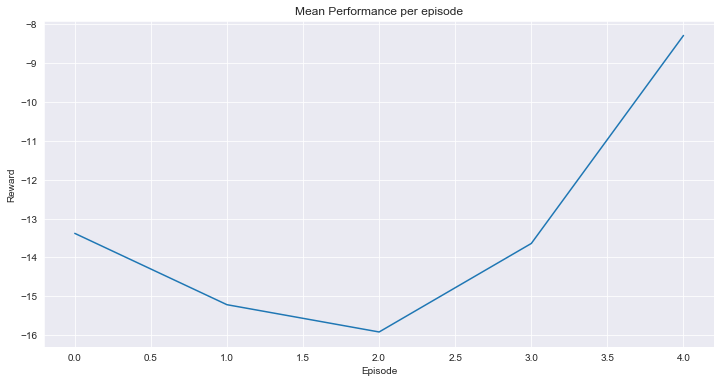

In [60]:
# As we used the performance tracking wrapper, we can now immediately visualize the results
env.render_performance()